## Imports

In [1]:
## imports
%matplotlib inline
import matplotlib.pyplot as plt
import statistics

%run utils.ipynb
%run preprocess.ipynb
%run ANN.ipynb
%run kNN.ipynb

## General

In [2]:
seed = 7
np.random.seed(seed)

In [3]:
# function to show correct and incorrect predictions
def show_results(results):
    print('Correct predictions: ')
    for pred, target in results:
        if pred == target:
            print("Predicted: ", pred, " Input: ", target)
    
    print('\nIncorrect predictions: ')
    for pred, target in results:
        if pred != target:
            print("Predicted: ", pred, " Input: ", target)

## Load MNIST data

In [4]:
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

In [5]:
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines() 
train_data_file.close() 
print("train set size: ", len(train_data_list))

test_data_file = open(test_file, 'r') 
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))

train set size:  60000
test set size:  10000


We set our preprocessing class for the ANN.

In [6]:
p = Preprocess(is_neural=True) # Preprocess object for ANN

mini_training_data = p.generate_mini_data(train_data_list, 1500)
X_train, y_train = p.preprocess_data(mini_training_data)

## Load GIMP digits

In [7]:
gimp_test_X, gimp_test_y = get_my_test_data("gimp")

gimp/*.png
Loading...  gimp/gimp_2.png
Loading...  gimp/gimo_6.png
Loading...  gimp/gimp_3.png
Loading...  gimp/gimp_1.png
Loading...  gimp/gimp_0.png
Loading...  gimp/gimp_4.png
Loading...  gimp/gimp_5.png
Loading...  gimp/gimp_7.png
Loading...  gimp/gimp_8.png
Loading...  gimp/gimp_9.png


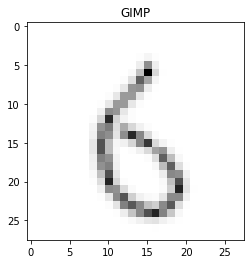

In [8]:
plt.imshow(np.asfarray(gimp_test_X[1].flatten().reshape((28,28))), cmap='Greys', interpolation='None')

plt.title('GIMP')

plt.savefig('gimp-digit', dpi=300)
plt.show()
plt.show()

In [9]:
gimp_test_X, gimp_test_y = map_target_to_output_layer(gimp_test_X, gimp_test_y)

# ANN

## Train model

We use the optimal hyperparameters obtained from Task1.

- 50 epochs
- learning rate = 0.3
- batch size = 1

In [10]:
n = NeuralNetwork(epochs=50, learningrate=0.3, batch_size=1)
n.train(X_train, y_train)

Training epoch#:  0
errors (SSE):  [535.80374548]
Training epoch#:  1
errors (SSE):  [205.72002754]
Training epoch#:  2
errors (SSE):  [115.48252849]
Training epoch#:  3
errors (SSE):  [64.07616103]
Training epoch#:  4
errors (SSE):  [38.17151961]
Training epoch#:  5
errors (SSE):  [24.65231101]
Training epoch#:  6
errors (SSE):  [16.76377641]
Training epoch#:  7
errors (SSE):  [12.10412825]
Training epoch#:  8
errors (SSE):  [9.14612284]
Training epoch#:  9
errors (SSE):  [7.28841553]
Training epoch#:  10
errors (SSE):  [5.97014897]
Training epoch#:  11
errors (SSE):  [5.02562921]
Training epoch#:  12
errors (SSE):  [4.34893479]
Training epoch#:  13
errors (SSE):  [3.8300955]
Training epoch#:  14
errors (SSE):  [3.41236939]
Training epoch#:  15
errors (SSE):  [3.07155225]
Training epoch#:  16
errors (SSE):  [2.7971083]
Training epoch#:  17
errors (SSE):  [2.57841895]
Training epoch#:  18
errors (SSE):  [2.401132]
Training epoch#:  19
errors (SSE):  [2.24164711]
Training epoch#:  20
er

## Test ANN model accuracy on GIMP digits

In [11]:
n.test(gimp_test_X, gimp_test_y)
ann_gimp_acc = n.evaluate(n.results)

print('Accuracy on GIMP digits % = ', ann_gimp_acc)

Accuracy on GIMP digits % =  80.0


Let's see which values our model predicted correctly and incorrectly.

In [12]:
show_results(n.results)

Correct predictions: 
Predicted:  2.0  Input:  2.0
Predicted:  3.0  Input:  3.0
Predicted:  1.0  Input:  1.0
Predicted:  0.0  Input:  0.0
Predicted:  4.0  Input:  4.0
Predicted:  5.0  Input:  5.0
Predicted:  7.0  Input:  7.0
Predicted:  8.0  Input:  8.0

Incorrect predictions: 
Predicted:  5.0  Input:  6.0
Predicted:  7.0  Input:  9.0


Some of the digits that were written using GIMP look slightly rotated, let's see if a model trained on rotated images performs better.

In [13]:
%run augment.ipynb

In [14]:
a = AugmentImages(is_neural=True)

### Its possible that some of the GIMP digits are slightly rotated so we test if training our model on rotated images improves performance. 

In [15]:
ann_gimp_aug_results = []

# We test on different rotations and record the best result.
rotations = [10, 20, 30, 45]

for num in rotations:
     ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    ## train and test model on gimp digits
    model = a.fit_augmented_model(X_train, y_train, gimp_test_X, gimp_test_y, 1500, num)
    
    ann_gimp_aug_results.append(model)

Shuffling data...
Training epoch#:  0
errors (SSE):  [564.09248384]
Training epoch#:  1
errors (SSE):  [235.41485947]
Training epoch#:  2
errors (SSE):  [136.84255968]
Training epoch#:  3
errors (SSE):  [81.03545402]
Training epoch#:  4
errors (SSE):  [51.79737301]
Training epoch#:  5
errors (SSE):  [31.09549694]
Training epoch#:  6
errors (SSE):  [19.58772098]
Training epoch#:  7
errors (SSE):  [14.03786269]
Training epoch#:  8
errors (SSE):  [10.72206244]
Training epoch#:  9
errors (SSE):  [8.60838711]
Training epoch#:  10
errors (SSE):  [7.10595597]
Training epoch#:  11
errors (SSE):  [6.02478492]
Training epoch#:  12
errors (SSE):  [5.2227149]
Training epoch#:  13
errors (SSE):  [4.61081828]
Training epoch#:  14
errors (SSE):  [4.13099083]
Training epoch#:  15
errors (SSE):  [3.74316587]
Training epoch#:  16
errors (SSE):  [3.42154503]
Training epoch#:  17
errors (SSE):  [3.14900413]
Training epoch#:  18
errors (SSE):  [2.91572404]
Training epoch#:  19
errors (SSE):  [2.71494925]
T

errors (SSE):  [5.35640955]
Training epoch#:  17
errors (SSE):  [4.92551526]
Training epoch#:  18
errors (SSE):  [4.58125078]
Training epoch#:  19
errors (SSE):  [4.2734517]
Training epoch#:  20
errors (SSE):  [4.01128698]
Training epoch#:  21
errors (SSE):  [3.78094919]
Training epoch#:  22
errors (SSE):  [3.57451538]
Training epoch#:  23
errors (SSE):  [3.39156879]
Training epoch#:  24
errors (SSE):  [3.23450115]
Training epoch#:  25
errors (SSE):  [3.0978237]
Training epoch#:  26
errors (SSE):  [2.97844592]
Training epoch#:  27
errors (SSE):  [2.86966316]
Training epoch#:  28
errors (SSE):  [2.76145041]
Training epoch#:  29
errors (SSE):  [2.64467942]
Training epoch#:  30
errors (SSE):  [2.54175625]
Training epoch#:  31
errors (SSE):  [2.45168712]
Training epoch#:  32
errors (SSE):  [2.36861536]
Training epoch#:  33
errors (SSE):  [2.29219667]
Training epoch#:  34
errors (SSE):  [2.22240961]
Training epoch#:  35
errors (SSE):  [2.15828421]
Training epoch#:  36
errors (SSE):  [2.0977

We get 90% for images rotated up to 20°.

In [16]:
print(ann_gimp_aug_results)
print(statistics.mean(ann_gimp_aug_results))

[70.0, 90.0, 80.0, 50.0]
72.5


## Load digits written on whiteboard

In [17]:
hw_digits_X, hw_digits_Y = get_my_test_data("hw_digits")

hw_digits/*.png
Loading...  hw_digits/img_1.png
Loading...  hw_digits/img_2.png
Loading...  hw_digits/img_3.png
Loading...  hw_digits/img_7.png
Loading...  hw_digits/img_6.png
Loading...  hw_digits/img_4.png
Loading...  hw_digits/img_5.png
Loading...  hw_digits/img_8.png
Loading...  hw_digits/img_9.png


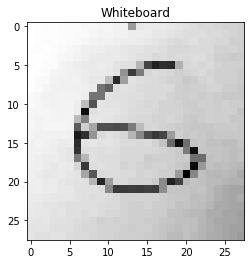

In [18]:
plt.imshow(np.asfarray(hw_digits_X[4].flatten().reshape((28,28))), cmap='Greys', interpolation='None')

plt.title('Whiteboard')
plt.savefig('hw-digit.png', dpi=300)
plt.show()

We can tell that this handwritten digit looks unclear in comparison to the digits written with GIMP.

In [19]:
hw_digits_X, hw_digits_Y = map_target_to_output_layer(hw_digits_X, hw_digits_Y)

It seems as if the iPhone has captured more noise in comparison to the GIMP digits. This is likely due to the quality of the camera and lighting of the room the photos were taken in.

In [20]:
hw_digits_X[:2]

[Array([0.40167892, 0.3982392 , 0.39779657, 0.39779657, 0.39779657,
        0.39779657, 0.39779657, 0.40167892, 0.39779657, 0.3994    ,
        0.40328234, 0.40556127, 0.40944362, 0.41332597, 0.41104707,
        0.41448683, 0.41720834, 0.41720834, 0.42020553, 0.42408788,
        0.42408788, 0.42797023, 0.42685214, 0.4307345 , 0.43894175,
        0.4428241 , 0.4462639 , 0.45014626, 0.40167892, 0.40167892,
        0.40167892, 0.40167892, 0.40167892, 0.40212154, 0.3982392 ,
        0.40167892, 0.40167892, 0.40167892, 0.40167892, 0.40944362,
        0.41332597, 0.41332597, 0.41104707, 0.40944362, 0.41720834,
        0.41720834, 0.4206481 , 0.42408788, 0.42797023, 0.43185258,
        0.43301338, 0.43461683, 0.4428241 , 0.44238153, 0.4462639 ,
        0.4462639 , 0.40556127, 0.40556127, 0.40167892, 0.40556127,
        0.40167892, 0.40212154, 0.3994    , 0.39779657, 0.40328234,
        0.4060039 , 0.40944362, 0.40716472, 0.44286683, 0.48200873,
        0.40832552, 0.41448683, 0.41609022, 0.42

## Test ANN model on handwritten whiteboard digits

In [21]:
n.test(hw_digits_X, hw_digits_Y)
hw_whiteboard_acc = n.evaluate(n.results)

print('Accuracy on handwritten digits % = ', hw_whiteboard_acc)

Accuracy on handwritten digits % =  11.11111111111111


In [22]:
show_results(n.results)

Correct predictions: 
Predicted:  9.0  Input:  9.0

Incorrect predictions: 
Predicted:  9.0  Input:  1.0
Predicted:  9.0  Input:  2.0
Predicted:  9.0  Input:  3.0
Predicted:  9.0  Input:  7.0
Predicted:  9.0  Input:  6.0
Predicted:  9.0  Input:  4.0
Predicted:  9.0  Input:  5.0
Predicted:  9.0  Input:  8.0


Evidently the model does not perform well on my own handwritten digits. 

## Test augmented ANN model on whiteboard digits

In [23]:
ann_whiteboard_aug_results = []

rotations = [10, 20, 30, 45]

for num in rotations:
     ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    # train and test model on whiteboard digits
    model = a.fit_augmented_model(X_train, y_train, hw_digits_X, hw_digits_Y, 1500, num)
    
    ann_whiteboard_aug_results.append(model)

Shuffling data...
Training epoch#:  0
errors (SSE):  [591.36009738]
Training epoch#:  1
errors (SSE):  [231.07263884]
Training epoch#:  2
errors (SSE):  [125.16206495]
Training epoch#:  3
errors (SSE):  [69.04568957]
Training epoch#:  4
errors (SSE):  [43.1509124]
Training epoch#:  5
errors (SSE):  [28.80025577]
Training epoch#:  6
errors (SSE):  [20.04240112]
Training epoch#:  7
errors (SSE):  [14.38466931]
Training epoch#:  8
errors (SSE):  [10.97501542]
Training epoch#:  9
errors (SSE):  [8.82229967]
Training epoch#:  10
errors (SSE):  [7.30675144]
Training epoch#:  11
errors (SSE):  [6.21275459]
Training epoch#:  12
errors (SSE):  [5.34079095]
Training epoch#:  13
errors (SSE):  [4.70078002]
Training epoch#:  14
errors (SSE):  [4.18758923]
Training epoch#:  15
errors (SSE):  [3.76756355]
Training epoch#:  16
errors (SSE):  [3.40020381]
Training epoch#:  17
errors (SSE):  [3.11969484]
Training epoch#:  18
errors (SSE):  [2.89213621]
Training epoch#:  19
errors (SSE):  [2.68724144]
T

errors (SSE):  [4.7521984]
Training epoch#:  17
errors (SSE):  [4.39552759]
Training epoch#:  18
errors (SSE):  [4.08771086]
Training epoch#:  19
errors (SSE):  [3.82182265]
Training epoch#:  20
errors (SSE):  [3.58852319]
Training epoch#:  21
errors (SSE):  [3.38067578]
Training epoch#:  22
errors (SSE):  [3.19380226]
Training epoch#:  23
errors (SSE):  [3.03566172]
Training epoch#:  24
errors (SSE):  [2.90113349]
Training epoch#:  25
errors (SSE):  [2.78668706]
Training epoch#:  26
errors (SSE):  [2.68485804]
Training epoch#:  27
errors (SSE):  [2.58925962]
Training epoch#:  28
errors (SSE):  [2.49981526]
Training epoch#:  29
errors (SSE):  [2.41767393]
Training epoch#:  30
errors (SSE):  [2.33836335]
Training epoch#:  31
errors (SSE):  [2.26597373]
Training epoch#:  32
errors (SSE):  [2.19157086]
Training epoch#:  33
errors (SSE):  [2.11897771]
Training epoch#:  34
errors (SSE):  [2.05297382]
Training epoch#:  35
errors (SSE):  [1.99418769]
Training epoch#:  36
errors (SSE):  [1.940

In [24]:
ann_whiteboard_aug_results

[11.11111111111111, 11.11111111111111, 22.22222222222222, 11.11111111111111]

## Test ANN model with edited whiteboard images

In [90]:
hw_edited_X, hw_edited_Y = get_my_test_data("hw_edited")

hw_edited/*.png
Loading...  hw_edited/img_1.png
Loading...  hw_edited/img_2.png
Loading...  hw_edited/img_3.png
Loading...  hw_edited/img_7.png
Loading...  hw_edited/img_6.png
Loading...  hw_edited/img_4.png
Loading...  hw_edited/img_5.png
Loading...  hw_edited/img_8.png
Loading...  hw_edited/img_9.png


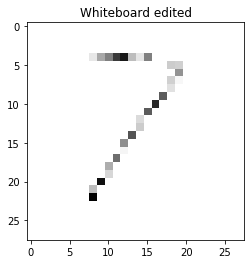

In [91]:
plt.imshow(np.asfarray(hw_edited_X[3].flatten().reshape((28,28))), cmap='Greys', interpolation='None')

plt.title('Whiteboard edited')
plt.savefig('hw-edited.png', dpi=300)
plt.show()

Looks cleaner and noise has clearly been reduced.

In [92]:
hw_edited_X, hw_edited_Y = map_target_to_output_layer(hw_edited_X, hw_edited_Y)
hw_edited_X[:2]

[Array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.05270588,
        0.01      , 0.01      , 0.01      , 0.01

In [93]:
n.test(hw_edited_X, hw_edited_Y)

hw_edited_acc = n.evaluate(n.results)

print('Accuracy on edited handwritten digits % = ', hw_edited_acc)

Accuracy on edited handwritten digits % =  22.22222222222222


In [94]:
show_results(n.results)

Correct predictions: 
Predicted:  1.0  Input:  1.0
Predicted:  2.0  Input:  2.0

Incorrect predictions: 
Predicted:  5.0  Input:  3.0
Predicted:  5.0  Input:  7.0
Predicted:  5.0  Input:  6.0
Predicted:  5.0  Input:  4.0
Predicted:  7.0  Input:  5.0
Predicted:  5.0  Input:  8.0
Predicted:  7.0  Input:  9.0


No improvement really... Let's test using the augmented model.

## Visualize difference in noise between GIMP, whiteboard and edited whiteboard images.

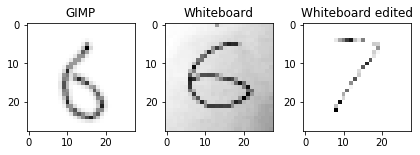

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.imshow(np.asfarray(gimp_test_X[1].flatten().reshape((28,28))), cmap='Greys', interpolation='None')
ax1.set_title('GIMP')

ax2.imshow(np.asfarray(hw_digits_X[4].flatten().reshape((28,28))), cmap='Greys', interpolation='None')
ax2.set_title('Whiteboard')

ax3.imshow(np.asfarray(hw_edited_X[3].flatten().reshape((28,28))), cmap='Greys', interpolation='None')
ax3.set_title('Whiteboard edited')

fig.tight_layout()

plt.savefig('noise-comparison.png', dpi=300)
plt.show()

## Test augmented ANN model on edited whiteboard images

In [96]:
aug_whiteboard_edited_results = []

rotations = [10, 20, 30, 45]

for num in rotations:
     ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    # train and test model on edited whiteboard digits
    model = a.fit_augmented_model(X_train, y_train, hw_edited_X, hw_edited_Y, 1500, num)
    
    aug_whiteboard_edited_results.append(model)

Shuffling data...
Training epoch#:  0
errors (SSE):  [570.6804368]
Training epoch#:  1
errors (SSE):  [237.8607037]
Training epoch#:  2
errors (SSE):  [135.21610905]
Training epoch#:  3
errors (SSE):  [78.11317215]
Training epoch#:  4
errors (SSE):  [47.81774248]
Training epoch#:  5
errors (SSE):  [30.68618486]
Training epoch#:  6
errors (SSE):  [21.2201159]
Training epoch#:  7
errors (SSE):  [15.78434218]
Training epoch#:  8
errors (SSE):  [12.30431548]
Training epoch#:  9
errors (SSE):  [9.83105552]
Training epoch#:  10
errors (SSE):  [8.03771913]
Training epoch#:  11
errors (SSE):  [6.71122169]
Training epoch#:  12
errors (SSE):  [5.72658705]
Training epoch#:  13
errors (SSE):  [5.00298575]
Training epoch#:  14
errors (SSE):  [4.45393196]
Training epoch#:  15
errors (SSE):  [4.0285699]
Training epoch#:  16
errors (SSE):  [3.68818275]
Training epoch#:  17
errors (SSE):  [3.40333423]
Training epoch#:  18
errors (SSE):  [3.1569404]
Training epoch#:  19
errors (SSE):  [2.93936744]
Train

errors (SSE):  [5.54286202]
Training epoch#:  17
errors (SSE):  [5.07398727]
Training epoch#:  18
errors (SSE):  [4.67755991]
Training epoch#:  19
errors (SSE):  [4.34205393]
Training epoch#:  20
errors (SSE):  [4.05529442]
Training epoch#:  21
errors (SSE):  [3.80724203]
Training epoch#:  22
errors (SSE):  [3.5886443]
Training epoch#:  23
errors (SSE):  [3.38890918]
Training epoch#:  24
errors (SSE):  [3.20627459]
Training epoch#:  25
errors (SSE):  [3.04556166]
Training epoch#:  26
errors (SSE):  [2.90103256]
Training epoch#:  27
errors (SSE):  [2.77897688]
Training epoch#:  28
errors (SSE):  [2.67378602]
Training epoch#:  29
errors (SSE):  [2.56988751]
Training epoch#:  30
errors (SSE):  [2.47391759]
Training epoch#:  31
errors (SSE):  [2.3927531]
Training epoch#:  32
errors (SSE):  [2.31602399]
Training epoch#:  33
errors (SSE):  [2.24526901]
Training epoch#:  34
errors (SSE):  [2.18043803]
Training epoch#:  35
errors (SSE):  [2.12079145]
Training epoch#:  36
errors (SSE):  [2.0655

In [97]:
aug_whiteboard_edited_results

[22.22222222222222, 22.22222222222222, 0.0, 11.11111111111111]

# kNN

In [98]:
p = Preprocess(is_neural=False) # Preprocess object for kNN

In [99]:
mini_training_data = p.generate_mini_data(train_data_list, 1500)
X_train, y_train = p.preprocess_data(mini_training_data)
len(X_train)

1500

## Load GIMP digits

In [100]:
gimp_test_X, gimp_test_y = get_my_test_data("gimp")

gimp/*.png
Loading...  gimp/gimp_2.png
Loading...  gimp/gimo_6.png
Loading...  gimp/gimp_3.png
Loading...  gimp/gimp_1.png
Loading...  gimp/gimp_0.png
Loading...  gimp/gimp_4.png
Loading...  gimp/gimp_5.png
Loading...  gimp/gimp_7.png
Loading...  gimp/gimp_8.png
Loading...  gimp/gimp_9.png


## Test kNN on GIMP digits

In [101]:
knn = kNN(X_train, y_train, k=3, weighted=True, sim=cosine_similarity)
knn.test(gimp_test_X, gimp_test_y)

Testing...
Testing complete!


In [102]:
gimp_knn_acc = knn.evaluate(knn.results)
print(gimp_knn_acc)

70.0


In [103]:
show_results(knn.results)

Correct predictions: 
Predicted:  3  Input:  3
Predicted:  1  Input:  1
Predicted:  0  Input:  0
Predicted:  4  Input:  4
Predicted:  7  Input:  7
Predicted:  8  Input:  8
Predicted:  9  Input:  9

Incorrect predictions: 
Predicted:  3  Input:  2
Predicted:  0  Input:  6
Predicted:  3  Input:  5


### Let's see how the kNN performs on rotated images.

In [104]:
a = AugmentImages(is_neural=False)

In [105]:
aug_gimp_knn_results = []

rotations = [10, 20, 30, 45]

for num in rotations:
    ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    # train and test model on gimp digits
    model = a.fit_augmented_model(X_train, y_train, gimp_test_X, gimp_test_y, 1500, num)
    aug_gimp_knn_results.append(model)

Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!


In [106]:
aug_gimp_knn_results

[70.0, 70.0, 80.0, 90.0]

## kNN on digits written on whiteboard

In [107]:
hw_digits_X, hw_digits_Y = get_my_test_data("hw_digits")

hw_digits/*.png
Loading...  hw_digits/img_1.png
Loading...  hw_digits/img_2.png
Loading...  hw_digits/img_3.png
Loading...  hw_digits/img_7.png
Loading...  hw_digits/img_6.png
Loading...  hw_digits/img_4.png
Loading...  hw_digits/img_5.png
Loading...  hw_digits/img_8.png
Loading...  hw_digits/img_9.png


In [108]:
knn = kNN(X_train, y_train, k=3, weighted=True, sim=cosine_similarity)
knn.test(hw_digits_X, hw_digits_Y)

knn_whiteboard_acc = knn.evaluate(knn.results)
knn_whiteboard_acc

Testing...
Testing complete!


0.0

### Test if augmented model performs better on whiteboard digits

In [109]:
aug_whiteboard_knn_results = []

rotations = [10, 20, 30, 45]

for num in rotations:
    ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    model = a.fit_augmented_model(X_train, y_train, hw_digits_X, hw_digits_Y, 1500, num)
    aug_whiteboard_knn_results.append(model)

Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!


In [110]:
aug_whiteboard_knn_results

[22.22222222222222, 0.0, 11.11111111111111, 33.33333333333333]

## kNN on edited whiteboard images

In [111]:
X_train, y_train = p.preprocess_data(mini_training_data)

hw_edited_X, hw_edited_Y = get_my_test_data("hw_edited")

hw_edited/*.png
Loading...  hw_edited/img_1.png
Loading...  hw_edited/img_2.png
Loading...  hw_edited/img_3.png
Loading...  hw_edited/img_7.png
Loading...  hw_edited/img_6.png
Loading...  hw_edited/img_4.png
Loading...  hw_edited/img_5.png
Loading...  hw_edited/img_8.png
Loading...  hw_edited/img_9.png


In [112]:
knn = kNN(X_train, y_train, k=3, weighted=True, sim=cosine_similarity)
knn.test(hw_edited_X, hw_edited_Y)

knn_whiteboard_edited_acc = knn.evaluate(knn.results)
knn_whiteboard_edited_acc

Testing...
Testing complete!


55.55555555555556

### Lets test the augmented kNN on edited whiteboard digits.

In [113]:
aug_knn_wh_edited_results = []

rotations = [10, 20, 30, 45]

for num in rotations:
    ## Clear and generate data again
    mini_training_data = p.generate_mini_data(train_data_list, 1500)

    X_train, y_train = p.preprocess_data(mini_training_data)
    
    model = a.fit_augmented_model(X_train, y_train, hw_edited_X, hw_edited_Y, 1500, num)
    aug_knn_wh_edited_results.append(model)

Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!
Shuffling data...
Testing...
Testing complete!


In [114]:
aug_knn_wh_edited_results

[55.55555555555556, 44.44444444444444, 55.55555555555556, 66.66666666666666]